In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ip_dir = "nvprof_results_--csv"

In [83]:
df = pd.read_csv(f"{ip_dir}/gpu_runtime_128_naive_4p", skiprows=3)
df

,Start,Duration,Grid X,Grid Y,Grid Z,Block X,Block Y,Block Z,Registers Per Thread,Static SMem,Dynamic SMem,Size,Throughput,SrcMemType,DstMemType,Device,Context,Stream,Name,Correlation_ID
0,ms,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,KB,GB/s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277.938684,6.656000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,9.169945,Pageable,Device,NVIDIA GeForce GTX 1050 (0),1.0,7.0,[CUDA memcpy HtoD],111.0
2,277.960829,6.656000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,9.169945,Pageable,Device,NVIDIA GeForce GTX 1050 (0),1.0,7.0,[CUDA memcpy HtoD],112.0
3,277.974910,2.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,7.335956,Pageable,Device,NVIDIA GeForce GTX 1050 (0),1.0,7.0,[CUDA memcpy HtoD],113.0
4,277.991934,120.582000,4.0,1.0,1.0,1024.0,1.0,1.0,26.0,0,0,NaN,NaN,NaN,NaN,NVIDIA GeForce GTX 1050 (0),1.0,7.0,"mat_mul_naive_4p_multiplications(int, int*, in...",114.0
5,278.112868,1.728000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,8.830318,Device,Pageable,NVIDIA GeForce GTX 1050 (0),1.0,7.0,[CUDA memcpy DtoH],115.0


In [84]:
mats_cache = [512, 1024, 2048, 4096]
mats_runtime = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
tiles = [8, 16, 32]
kernel = "naive"
columns = ["Duration"]

In [85]:
kernel_name = "mat_mul_naive(int, int*, int*, int*)"
tile = "p"
data_p = []
for mat in mats_runtime:
    df = pd.read_csv(f"{ip_dir}/gpu_runtime_{mat}_{kernel}_{tile}", skiprows=3)
    duration = float(df[df["Name"] == kernel_name][columns].values[0][0])
    data_p.append([mat, duration])
data_p

[[128, 44.802],
 [256, 301.741],
 [512, 2.012281],
 [1024, 15.885015],
 [2048, 145.726492],
 [4096, 1.384866],
 [8192, 12.082516],
 [16384, 89.051022]]

In [42]:
kernel_name = "mat_mul_naive_4p_multiplications(int, int*, int*, int*)"
tile = "4p"
data_4p = []
for mat in mats_runtime:
    df = pd.read_csv(f"{ip_dir}/gpu_runtime_{mat}_{kernel}_{tile}", skiprows=3)
    duration = float(df[df["Name"] == kernel_name][columns].values[0][0])
    data_4p.append([mat, duration])
data_4p


[[128, 120.582],
 [256, 775.713],
 [512, 5.285892],
 [1024, 42.20842],
 [2048, 365.552017],
 [4096, 2.945687],
 [8192, 24.940062],
 [16384, 193.030232]]

In [45]:
df_p = pd.DataFrame(data_p, columns = ["Matrix Size", "Naive with p multiplications"])
df_p

,Matrix Size,Naive with p multiplications
0,128,44.802000
1,256,301.741000
2,512,2.012281
3,1024,15.885015
4,2048,145.726492
5,4096,1.384866
6,8192,12.082516
7,16384,89.051022


In [47]:
df_4p = pd.DataFrame(data_4p, columns = ["Matrix Size", "Naive with 4p multiplications"])
df_4p

,Matrix Size,Naive with 4p multiplications
0,128,120.582000
1,256,775.713000
2,512,5.285892
3,1024,42.208420
4,2048,365.552017
5,4096,2.945687
6,8192,24.940062
7,16384,193.030232


In [59]:
df_p_4p = pd.merge(df_p, df_4p,on="Matrix Size")
df_p_4p

,Matrix Size,Naive with p multiplications,Naive with 4p multiplications
0,128,44.802000,120.582000
1,256,301.741000,775.713000
2,512,2.012281,5.285892
3,1024,15.885015,42.208420
4,2048,145.726492,365.552017
5,4096,1.384866,2.945687
6,8192,12.082516,24.940062
7,16384,89.051022,193.030232


In [60]:
df_p_4p.to_latex()

/tmp/ipykernel_238084/3922050936.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_p_4p.to_latex()


'\\begin{tabular}{lrrr}\n\\toprule\n{} &  Matrix Size &  Naive with p multiplications &  Naive with 4p multiplications \\\\\n\\midrule\n0 &          128 &                     44.802000 &                     120.582000 \\\\\n1 &          256 &                    301.741000 &                     775.713000 \\\\\n2 &          512 &                      2.012281 &                       5.285892 \\\\\n3 &         1024 &                     15.885015 &                      42.208420 \\\\\n4 &         2048 &                    145.726492 &                     365.552017 \\\\\n5 &         4096 &                      1.384866 &                       2.945687 \\\\\n6 &         8192 &                     12.082516 &                      24.940062 \\\\\n7 &        16384 &                     89.051022 &                     193.030232 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [93]:
kernel_name = "mat_mul_naive(int, int*, int*, int*)"
tile = "p"
data_p = []
for mat in mats_runtime:
    df = pd.read_csv(f"{ip_dir}/gpu_runtime_{mat}_{kernel}_{tile}", skiprows=3)
    duration = sum([float(each[0]) for each in df[columns].values[1:]])
    print(duration)
    data_p.append([mat, duration])
data_p

61.795
356.015
2.21661
17.424281999999998
152.973466
1.415346
12.225783
89.551343


[[128, 61.795],
 [256, 356.015],
 [512, 2.21661],
 [1024, 17.424281999999998],
 [2048, 152.973466],
 [4096, 1.415346],
 [8192, 12.225783],
 [16384, 89.551343]]

## Tiles

In [68]:
kernel_name = "mat_mul_tiled(int, int, int*, int*, int*)"
kernel = "tiled"
data_tile = []
for tile in tiles:
    for mat in mats_runtime:
        if mat < 4096:
            continue
                
        df = pd.read_csv(f"{ip_dir}/gpu_runtime_{mat}_{kernel}_{tile}", skiprows=3)
        duration = float(df[df["Name"] == kernel_name][columns].values[0][0])
        if mat <= 4096:
            duration /= 1000
        data_tile.append([mat,tile, duration])
data_tile

[[4096, 8, 0.430580348],
 [8192, 8, 4.398136],
 [16384, 8, 40.942623],
 [4096, 16, 0.24073782700000002],
 [8192, 16, 2.090084],
 [16384, 16, 15.931402],
 [4096, 32, 0.219180255],
 [8192, 32, 1.899215],
 [16384, 32, 14.175673]]

In [69]:
df_tiled = pd.DataFrame(data_tile, columns = ["Matrix Size", "Tile Size", "Execution Time"])
df_tiled

,Matrix Size,Tile Size,Execution Time
0,4096,8,0.430580
1,8192,8,4.398136
2,16384,8,40.942623
3,4096,16,0.240738
4,8192,16,2.090084
5,16384,16,15.931402
6,4096,32,0.219180
7,8192,32,1.899215
8,16384,32,14.175673


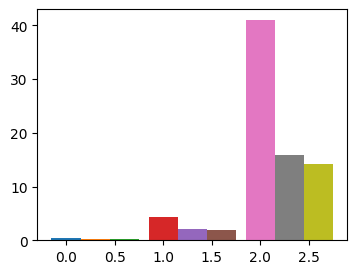

In [80]:
width = 0.3
fig = plt.figure(figsize=(4,3))
ax = plt.gca()
for i,mat in enumerate([4096, 8192, 16384]):
    for t,tile in enumerate(tiles): 
        print()
        ax.bar(i+width*t, df_tiled[(df_tiled["Matrix Size"] == mat) & (df_tiled["Tile Size"] == tile)]["Execution Time"].values[0],width=width)

In [73]:
df_tiled[(df_tiled["Matrix Size"] == mat) & (df_tiled["Tile Size"] == tile)]["Execution Time"].values[0]

0.219180255

In [76]:
ax

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

## Cache statistics

In [132]:
df = pd.read_csv(f"{ip_dir}/cache_trace_4096_naive_p", skiprows=5)
df = df[:-1]
df["Metric Description"] = df["Metric Description"].apply(lambda x: x.replace(" ", "\n").replace("Transactions","")[:-1]+"s")
df["Avg"] = df["Avg"].apply(lambda x: float(x))
df

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,NVIDIA GeForce GTX 1050 (0),"mat_mul_naive(int, int*, int*, int*)",1,gld_transactions,Global\nLoads,34363311618,34363311618,3.436331e+10
1,NVIDIA GeForce GTX 1050 (0),"mat_mul_naive(int, int*, int*, int*)",1,l2_read_transactions,L2\nReads,9665758390,9665758390,9.665758e+09
2,NVIDIA GeForce GTX 1050 (0),"mat_mul_naive(int, int*, int*, int*)",1,dram_read_transactions,Device\nMemory\nReads,4281298558,4281298558,4.281299e+09


<BarContainer object of 3 artists>

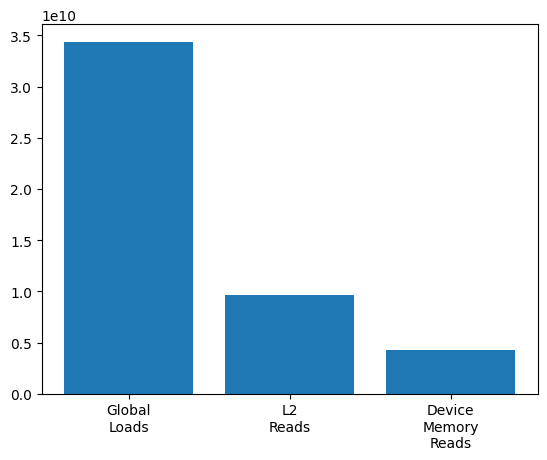

In [133]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df["Metric Description"], df["Avg"])

In [134]:
df2 = pd.read_csv(f"{ip_dir}/cache_trace_4096_tiled_32", skiprows=5)
df2 = df2[:-1]
df2["Metric Description"] = df2["Metric Description"].apply(lambda x: x.replace(" ", "\n").replace("Transactions","")[:-1]+"s")
df2["Avg"] = df2["Avg"].apply(lambda x: float(x))
df2

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,NVIDIA GeForce GTX 1050 (0),"mat_mul_tiled(int, int, int*, int*, int*)",1,gld_transactions,Global\nLoads,1074100946,1074100946,1.074101e+09
1,NVIDIA GeForce GTX 1050 (0),"mat_mul_tiled(int, int, int*, int*, int*)",1,l2_read_transactions,L2\nReads,403319344,403319344,4.033193e+08
2,NVIDIA GeForce GTX 1050 (0),"mat_mul_tiled(int, int, int*, int*, int*)",1,dram_read_transactions,Device\nMemory\nReads,206687495,206687495,2.066875e+08


<BarContainer object of 3 artists>

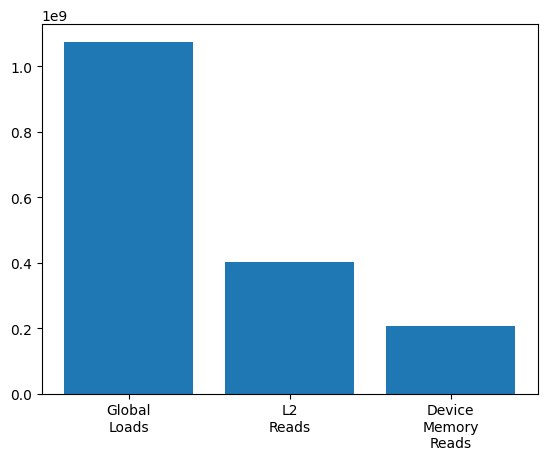

In [135]:
fig = plt.figure()
ax = plt.gca()
ax.bar(df2["Metric Description"], df2["Avg"])